In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import csv

In [2]:
readIn = pd.read_csv("data/df.csv")
df = pd.DataFrame(readIn)


In [3]:
readIn = pd.read_csv("data/data_submission_example.csv")
df_target = pd.DataFrame(readIn)
# df_target.head(20)

# print(df_target.shape)
# print(df_target['BORROWER_ID'].unique)

In [4]:
# print(df.shape)

# index_to_keep = df['BORROWER_ID'].isin(df_target['BORROWER_ID'])

# df = df[index_to_keep]

# print(df.shape)

In [5]:
df.head(10)

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
0,TpK8osXs,d8SqtuEV,1d42bbf5,2.0,0.0,31,2457052,0.00,479a2e13,0.0,...,1.00,0.0,1241.0,98.0,98.0,20.0,A,0.0,-,NaN
1,1G10DfKj,gII7nnq4,1d42bbf5,2.0,16350.0,31,2457043,7.05,479a2e13,127305.0,...,74.77,100003.0,1199.0,98.0,98.0,179.0,A,7.0,-,NaN
2,2NLT774,MMkJ8z/e,1d42bbf5,0.0,0.0,31,2457038,0.00,479a2e13,0.0,...,0.99,0.0,1221.0,98.0,98.0,0.0,A,0.0,-,NaN
3,VpylRvay,M417onFP,1d42bbf5,2.0,2395.0,31,2457091,0.00,479a2e13,0.0,...,74.30,100002.0,1260.0,98.0,98.0,178.0,A,1.0,-,NaN
4,5tsDwTjS,u9GRAuen,1d42bbf5,2.0,0.0,31,2457093,0.00,479a2e13,0.0,...,0.98,0.0,1204.0,98.0,98.0,0.0,A,0.0,-,NaN
5,ebtK6u+,L2Nu2zZe,1d42bbf5,2.0,0.0,31,2457046,0.00,479a2e13,0.0,...,1.03,0.0,1255.0,98.0,98.0,4.0,A,0.0,-,NaN
6,ffJh4MY,5A0GWOi2,1d42bbf5,2.0,0.0,31,2457049,0.00,479a2e13,0.0,...,1.04,0.0,1234.0,98.0,98.0,0.0,A,0.0,-,NaN
7,eo09vYuo,lqPGd2+x,1d42bbf5,2.0,0.0,31,2457081,0.00,479a2e13,0.0,...,1.00,0.0,1228.0,98.0,98.0,3.0,A,0.0,-,NaN
8,siZsAv94,O7soZ57f,1d42bbf5,2.0,0.0,31,2457084,0.00,479a2e13,0.0,...,1.01,0.0,1211.0,98.0,98.0,120.0,A,0.0,-,NaN
9,Cau-hmu+,CnYRm/vc,1d42bbf5,2.0,1580.0,31,2457100,10.74,479a2e13,109235.0,...,1.01,100001.0,1238.0,98.0,98.0,29.0,A,0.0,-,NaN


In [6]:
len(df)

1558442

In [7]:
# coloumns=[
#     'CONTRACT_ID',
#     'BORROWER_ID',
#     'CONTRACT_BANK_ID',
#     'CONTRACT_CREDIT_INTERMEDIARY',
#     'CONTRACT_CREDIT_LOSS',
#     'CONTRACT_CURRENCY',
#     'CONTRACT_DATE_OF_LOAN_AGREEMENT',
#     'CONTRACT_DEPT_SERVICE_TO_INCOME',
#     'CONTRACT_FREQUENCY_TYPE',
#     'CONTRACT_INCOME',
#     'CONTRACT_INSTALMENT_AMOUNT',
#     'CONTRACT_INSTALMENT_AMOUNT_2',
#     'CONTRACT_INTEREST_PERIOD',
#     'CONTRACT_INTEREST_RATE',
#     'CONTRACT_LGD',
#     'CONTRACT_LOAN_AMOUNT',
#     'CONTRACT_LOAN_CONTRACT_TYPE',
#     'CONTRACT_LOAN_TO_VALUE_RATIO',
#     'CONTRACT_LOAN_TYPE',
#     'CONTRACT_MARKET_VALUE',
#     'CONTRACT_MATURITY_DATE',
#     'CONTRACT_MORTGAGE_LENDING_VALUE',
#     'CONTRACT_MORTGAGE_TYPE',
#     'CONTRACT_REFINANCED',
#     'CONTRACT_RISK_WEIGHTED_ASSETS',
#     'CONTRACT_TYPE_OF_INTEREST_REPAYMENT',
#     'BORROWER_BIRTH_YEAR',
#     'BORROWER_CITIZENSHIP',
#     'BORROWER_COUNTRY',
#     'BORROWER_COUNTY',
#     'BORROWER_TYPE_OF_CUSTOMER',
#     'BORROWER_TYPE_OF_SETTLEMENT',
#     'TARGET_EVENT',
#     'TARGET_EVENT_DAY'
# ]

# coloumns=[
#     'CONTRACT_ID',
#     'BORROWER_ID',
#     'CONTRACT_BANK_ID',
#     'CONTRACT_CREDIT_LOSS',
#     'CONTRACT_CURRENCY',
#     'CONTRACT_DATE_OF_LOAN_AGREEMENT',
#     'CONTRACT_FREQUENCY_TYPE',
#     'CONTRACT_LOAN_AMOUNT',
#     'CONTRACT_LOAN_CONTRACT_TYPE',
#     'CONTRACT_LOAN_TYPE',
#     'CONTRACT_MATURITY_DATE',
#     'BORROWER_TYPE_OF_CUSTOMER',
#     'TARGET_EVENT'
# ]

In [8]:
# df=df[coloumns]

# Data preparation

In [9]:
dummy_cols=[]

def dummy_creator(df, column, dummy_col):

  ps_dummies = pd.get_dummies(df[column], prefix = column, drop_first = False)

  dummy_col.append(ps_dummies.columns)

  df = df.merge(ps_dummies, left_index = True, right_index = True, how = 'left')

  return df, dummy_col

## Coloumns

### BORROWER_BIRTH_YEAR

In [10]:
print(df['BORROWER_BIRTH_YEAR'].min ())
print(df['BORROWER_BIRTH_YEAR'].max())

1188.0
1287.0


In [11]:
df['B_BIRTH_CATEGORY']=((df['BORROWER_BIRTH_YEAR']-df['BORROWER_BIRTH_YEAR'].min())/10).astype(int)

In [12]:
df.head(10)

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY,B_BIRTH_CATEGORY
0,TpK8osXs,d8SqtuEV,1d42bbf5,2.0,0.0,31,2457052,0.00,479a2e13,0.0,...,0.0,1241.0,98.0,98.0,20.0,A,0.0,-,NaN,5
1,1G10DfKj,gII7nnq4,1d42bbf5,2.0,16350.0,31,2457043,7.05,479a2e13,127305.0,...,100003.0,1199.0,98.0,98.0,179.0,A,7.0,-,NaN,1
2,2NLT774,MMkJ8z/e,1d42bbf5,0.0,0.0,31,2457038,0.00,479a2e13,0.0,...,0.0,1221.0,98.0,98.0,0.0,A,0.0,-,NaN,3
3,VpylRvay,M417onFP,1d42bbf5,2.0,2395.0,31,2457091,0.00,479a2e13,0.0,...,100002.0,1260.0,98.0,98.0,178.0,A,1.0,-,NaN,7
4,5tsDwTjS,u9GRAuen,1d42bbf5,2.0,0.0,31,2457093,0.00,479a2e13,0.0,...,0.0,1204.0,98.0,98.0,0.0,A,0.0,-,NaN,1
5,ebtK6u+,L2Nu2zZe,1d42bbf5,2.0,0.0,31,2457046,0.00,479a2e13,0.0,...,0.0,1255.0,98.0,98.0,4.0,A,0.0,-,NaN,6
6,ffJh4MY,5A0GWOi2,1d42bbf5,2.0,0.0,31,2457049,0.00,479a2e13,0.0,...,0.0,1234.0,98.0,98.0,0.0,A,0.0,-,NaN,4
7,eo09vYuo,lqPGd2+x,1d42bbf5,2.0,0.0,31,2457081,0.00,479a2e13,0.0,...,0.0,1228.0,98.0,98.0,3.0,A,0.0,-,NaN,4
8,siZsAv94,O7soZ57f,1d42bbf5,2.0,0.0,31,2457084,0.00,479a2e13,0.0,...,0.0,1211.0,98.0,98.0,120.0,A,0.0,-,NaN,2
9,Cau-hmu+,CnYRm/vc,1d42bbf5,2.0,1580.0,31,2457100,10.74,479a2e13,109235.0,...,100001.0,1238.0,98.0,98.0,29.0,A,0.0,-,NaN,5


In [13]:
df = df.drop('BORROWER_BIRTH_YEAR', axis=1)

### BORROWER_CITIZENSHIP

In [14]:
len(df['BORROWER_CITIZENSHIP'].value_counts())

40

In [15]:
df, dummy_cols=dummy_creator(df,'BORROWER_CITIZENSHIP', dummy_cols)

In [16]:
df=df.drop('BORROWER_CITIZENSHIP', axis=1)

### BORROWER_COUNTRY

In [17]:
df=df.drop('BORROWER_COUNTRY', axis=1)

### BORROWER_COUNTY

In [18]:
df, dummy_cols=dummy_creator(df,'BORROWER_COUNTY', dummy_cols)

In [19]:
df=df.drop('BORROWER_COUNTY', axis=1)

In [20]:
df.head(10)

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,BORROWER_COUNTY_189.0,BORROWER_COUNTY_190.0,BORROWER_COUNTY_191.0,BORROWER_COUNTY_192.0,BORROWER_COUNTY_193.0,BORROWER_COUNTY_194.0,BORROWER_COUNTY_195.0,BORROWER_COUNTY_196.0,BORROWER_COUNTY_197.0,BORROWER_COUNTY_198.0
0,TpK8osXs,d8SqtuEV,1d42bbf5,2.0,0.0,31,2457052,0.00,479a2e13,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1G10DfKj,gII7nnq4,1d42bbf5,2.0,16350.0,31,2457043,7.05,479a2e13,127305.0,...,False,False,False,False,False,False,False,False,False,False
2,2NLT774,MMkJ8z/e,1d42bbf5,0.0,0.0,31,2457038,0.00,479a2e13,0.0,...,False,False,False,False,False,False,False,False,False,False
3,VpylRvay,M417onFP,1d42bbf5,2.0,2395.0,31,2457091,0.00,479a2e13,0.0,...,False,False,False,False,False,False,False,False,False,False
4,5tsDwTjS,u9GRAuen,1d42bbf5,2.0,0.0,31,2457093,0.00,479a2e13,0.0,...,False,False,False,False,False,False,False,False,False,False
5,ebtK6u+,L2Nu2zZe,1d42bbf5,2.0,0.0,31,2457046,0.00,479a2e13,0.0,...,False,False,False,False,False,False,False,False,False,False
6,ffJh4MY,5A0GWOi2,1d42bbf5,2.0,0.0,31,2457049,0.00,479a2e13,0.0,...,False,False,False,False,False,False,False,False,False,False
7,eo09vYuo,lqPGd2+x,1d42bbf5,2.0,0.0,31,2457081,0.00,479a2e13,0.0,...,False,False,False,False,False,False,False,False,False,False
8,siZsAv94,O7soZ57f,1d42bbf5,2.0,0.0,31,2457084,0.00,479a2e13,0.0,...,False,False,False,False,False,False,False,False,False,False
9,Cau-hmu+,CnYRm/vc,1d42bbf5,2.0,1580.0,31,2457100,10.74,479a2e13,109235.0,...,False,False,False,False,False,False,False,False,False,False


### BORROWER_TYPE_OF_CUSTOMER

In [21]:
df, dummy_cols=dummy_creator(df,'BORROWER_TYPE_OF_CUSTOMER', dummy_cols)
df=df.drop('BORROWER_TYPE_OF_CUSTOMER', axis=1)

### BORROWER_TYPE_OF_SETTLEMENT

In [22]:
df, dummy_cols=dummy_creator(df,'BORROWER_TYPE_OF_SETTLEMENT', dummy_cols)
df=df.drop('BORROWER_TYPE_OF_SETTLEMENT', axis=1)

### CONTRACT_BANK_ID

In [23]:
df, dummy_cols=dummy_creator(df,'CONTRACT_BANK_ID', dummy_cols)
df=df.drop('CONTRACT_BANK_ID', axis=1)

### CONTRACT_CREDIT_INTERMEDIARY

In [24]:
df, dummy_cols=dummy_creator(df,'CONTRACT_CREDIT_INTERMEDIARY', dummy_cols)
df=df.drop('CONTRACT_CREDIT_INTERMEDIARY', axis=1)

### CONTRACT_CURRENCY

In [25]:
df=df.drop('CONTRACT_CURRENCY', axis=1)

### CONTRACT_DATE_OF_LOAN_AGREEMENT

In [26]:
startday=df['CONTRACT_DATE_OF_LOAN_AGREEMENT'].min()
df['CONTRACT_DATE_OF_LOAN_AGREEMENT']=df['CONTRACT_DATE_OF_LOAN_AGREEMENT']-df['CONTRACT_DATE_OF_LOAN_AGREEMENT'].min()

### CONTRACT_FREQUENCY_TYPE

In [27]:
df, dummy_cols=dummy_creator(df,'CONTRACT_FREQUENCY_TYPE', dummy_cols)
df=df.drop('CONTRACT_FREQUENCY_TYPE', axis=1)

### CONTRACT_INTEREST_PERIOD

### CONTRACT_LOAN_CONTRACT_TYPE

In [28]:
df, dummy_cols=dummy_creator(df,'CONTRACT_LOAN_CONTRACT_TYPE', dummy_cols)
df=df.drop('CONTRACT_LOAN_CONTRACT_TYPE', axis=1)

### CONTRACT_LOAN_TYPE

In [29]:
df, dummy_cols=dummy_creator(df,'CONTRACT_LOAN_TYPE', dummy_cols)
df=df.drop('CONTRACT_LOAN_TYPE', axis=1)

### CONTRACT_MATURITY_DATE

In [30]:
df['CONTRACT_MATURITY_DATE']=df['CONTRACT_MATURITY_DATE']-startday

### CONTRACT_MORTGAGE_TYPE

In [31]:
df, dummy_cols=dummy_creator(df,'CONTRACT_MORTGAGE_TYPE', dummy_cols)
df=df.drop('CONTRACT_MORTGAGE_TYPE', axis=1)

### CONTRACT_REFINANCED

In [32]:
df, dummy_cols=dummy_creator(df,'CONTRACT_REFINANCED', dummy_cols)
df=df.drop('CONTRACT_REFINANCED', axis=1)

### CONTRACT_RISK_WEIGHTED_ASSETS

<Axes: >

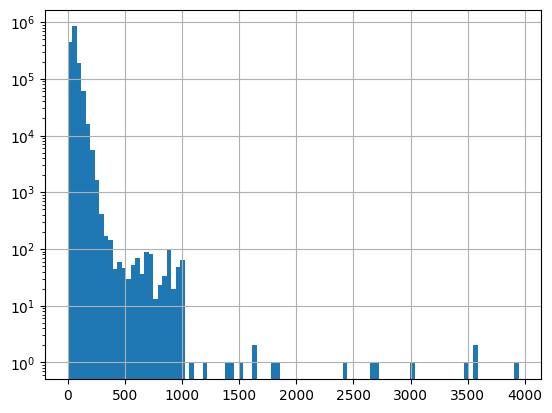

In [33]:
df['CONTRACT_RISK_WEIGHTED_ASSETS'].hist(bins=100, log=True)

### CONTRACT_TYPE_OF_INTEREST_REPAYMENT

In [34]:
df, dummy_cols=dummy_creator(df,'CONTRACT_TYPE_OF_INTEREST_REPAYMENT', dummy_cols)
df=df.drop('CONTRACT_TYPE_OF_INTEREST_REPAYMENT', axis=1)

### TARGET_EVENT_DAY

In [35]:
df['TARGET_EVENT_DAY']=df['TARGET_EVENT_DAY']-startday

### TARGET_EVENT

### Check ISNA

In [36]:
df.head(10)

,CONTRACT_ID,BORROWER_ID,CONTRACT_CREDIT_LOSS,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_INCOME,CONTRACT_INSTALMENT_AMOUNT,CONTRACT_INTEREST_RATE,CONTRACT_LGD,CONTRACT_LOAN_AMOUNT,...,CONTRACT_REFINANCED_10001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_0.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100002.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100003.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100004.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_110001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140002.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140003.0
0,TpK8osXs,d8SqtuEV,0.0,28,0.00,0.0,9545.0,22.08,175424.0,192161,...,False,True,False,False,False,False,False,False,False,False
1,1G10DfKj,gII7nnq4,16350.0,19,7.05,127305.0,8899.0,22.35,282553.0,275924,...,False,False,False,False,True,False,False,False,False,False
2,2NLT774,MMkJ8z/e,0.0,14,0.00,0.0,14329.0,0.00,68981.0,138862,...,False,True,False,False,False,False,False,False,False,False
3,VpylRvay,M417onFP,2395.0,67,0.00,0.0,4003.0,23.92,163319.0,169624,...,False,False,False,True,False,False,False,False,False,False
4,5tsDwTjS,u9GRAuen,0.0,69,0.00,0.0,11214.0,35.12,74244.0,100079,...,False,True,False,False,False,False,False,False,False,False
5,ebtK6u+,L2Nu2zZe,0.0,22,0.00,0.0,11405.0,16.28,118161.0,140975,...,False,True,False,False,False,False,False,False,False,False
6,ffJh4MY,5A0GWOi2,0.0,25,0.00,0.0,6045.0,16.27,42047.0,60963,...,False,True,False,False,False,False,False,False,False,False
7,eo09vYuo,lqPGd2+x,0.0,57,0.00,0.0,10431.0,21.66,170739.0,190782,...,False,True,False,False,False,False,False,False,False,False
8,siZsAv94,O7soZ57f,0.0,60,0.00,0.0,14638.0,37.40,130944.0,130827,...,False,True,False,False,False,False,False,False,False,False
9,Cau-hmu+,CnYRm/vc,1580.0,76,10.74,109235.0,11677.0,25.06,271190.0,307046,...,False,False,True,False,False,False,False,False,False,False


In [37]:
# df=df.drop_duplicates()

print(df.shape)
df.to_csv('data/df_dummy_prepped.csv', index=False)

(1558442, 468)


In [38]:
flattened_list = []
for index_list in dummy_cols:
    flattened_list.extend(index_list)

In [39]:
with open('data/dummy_cols.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(flattened_list)